In [1]:
#import libraries
import numpy as np
import numpy.matlib as matlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#Define data function
def data(N,sigma):
    w=np.ones(10)/np.sqrt(10)   
    w1=[1., 1., 1., 1., 1., -1., -1., -1., -1., -1.]/np.sqrt(10)   
    w2=[-1., -1., 0, 1., 1., -1., -1., 0, -1., -1.]/np.sqrt(8)   
    x=np.zeros((4,10))   
    x[1,:]=x[0,:]+sigma*w1   
    x[2,:]=x[0,:]+sigma*w2   
    x[3,:]=x[2,:]+sigma*w1   
    X1=x+sigma*matlib.repmat(w,4,1)/2   
    X2=x-sigma*matlib.repmat(w,4,1)/2   
    X1=matlib.repmat(X1,2*N,1)   
    X2=matlib.repmat(X2,2*N,1)   
    X=np.concatenate((X1, X2), axis=0)   
    Y=np.concatenate((np.ones(4*2*N), -np.ones(4*2*N)),axis=0)   
    Z=np.random.permutation(16*N)   
    Z=Z[:N]   
    X=X[Z,:]   
    X=X+0.2*sigma*np.random.randn(N,10)   
    Y=Y[Z]
    return X,Y

In [2]:
#Call Data function to generate the data
X,Y=data(100,1)

In [3]:
#Check the data creation
X.shape

(100, 10)

In [4]:
Y.shape

(100,)

In [5]:
from sklearn import svm

In [6]:
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  

In [7]:
svm_model = svm.SVC(kernel='linear', C=100, random_state=999)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (70, 10) (70,)
Test set: (30, 10) (30,)


In [9]:
model = svm_model.fit(X_train, y_train)

In [10]:
model.get_params()

{'C': 100,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': 999,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [11]:
yhat = svm_model.predict(X_test)
yhat [0:5]

array([-1.,  1.,  1.,  1.,  1.])

In [12]:
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [13]:
svm_train_acc = metrics.accuracy_score(y_train, svm_model.predict(X_train))
svm_test_acc = metrics.accuracy_score(y_test, yhat)
print ('train', svm_train_acc, 'test', svm_test_acc)

train 1.0 test 0.9333333333333333


In [14]:
svm_f1 = f1_score(y_test, yhat, average='weighted') 
svm_f1

0.9320574162679426

In [15]:
svm_jac = jaccard_score(y_test, yhat, average='weighted')
svm_jac

0.8733333333333333

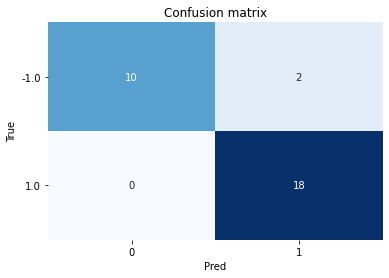

In [16]:
classes = np.unique(y_test)
fig, ax = plt.subplots()
cm = metrics.confusion_matrix(y_test, yhat, labels=classes)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False)
ax.set(xlabel="Pred", ylabel="True", title="Confusion matrix")
ax.set_yticklabels(labels=classes, rotation=0)
plt.show()

FROM DOCUMENTATION:
dual_coef_ndarray of shape (n_class-1, n_SV)
Dual coefficients of the support vector in the decision function (see Mathematical formulation), multiplied by their targets. For multiclass, coefficient for all 1-vs-1 classifiers. The layout of the coefficients in the multiclass case is somewhat non-trivial. See the multi-class section of the User Guide for details.

In [17]:
model.dual_coef_

array([[-2.39479931, -2.59001793, -6.4523967 , -3.8345985 , -0.31736028,
         0.05377189,  0.89808729, 14.63731354]])

FROM DOCUMENTATION:
coef_ndarray of shape (n_class * (n_class-1) / 2, n_features)
Weights assigned to the features (coefficients in the primal problem). This is only available in the case of a linear kernel.

coef_ is a readonly property derived from dual_coef_ and support_vectors_.

In [18]:
model.coef_

array([[1.39973346, 2.01916161, 1.16980002, 2.04765798, 2.8905792 ,
        0.23272255, 0.83586242, 1.86607429, 2.17246748, 1.50445758]])

This is an array of shape ((n_class * (n_class -1) / 2), n_features) and represents the aforementioned weights.

According to the doc the weights are ordered as:

class 0 vs class 1
class 0 vs class 2
...
class 0 vs class n-1
class 1 vs class 2

In [19]:
model.classes_   # represents the unique classes

array([-1.,  1.])

In [20]:
# Get support vector indices
support_vector_indices = model.support_
print(support_vector_indices)

[ 4 10 33 37 58 13 47 56]


In [21]:
# Get number of support vectors per class
support_vectors_per_class = model.n_support_
print(support_vectors_per_class)

[5 3]


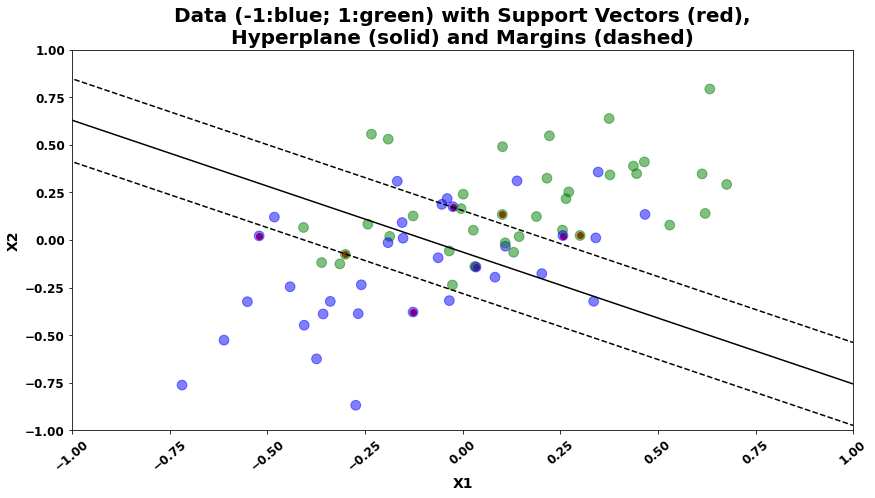

In [22]:
from textwrap import wrap

# Get support vectors themselves
support_vectors = model.support_vectors_

# get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (model.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize=(14, 7))
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# Visualize support vectors
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
color = ['blue' if c == -1 else 'green' for c in y_train]
plt.scatter(X_train[:,0], X_train[:,1], c=color, s=95, alpha=0.5)

# #Plot the hyperplane
# plt.plot(xx, yy, c='black', linewidth=3)

title = 'Data (-1:blue; 1:green) with Support Vectors (red), Hyperplane (solid) and Margins (dashed)'
plt.title('\n'.join(wrap(title, 60)), fontweight='bold', fontsize=20, ha='center')
plt.xlabel('X1', fontweight='bold', fontsize=14)
plt.ylabel('X2', fontweight='bold', fontsize=14)
plt.xticks(rotation=40, fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)
plt.ylim(-1,1)
plt.xlim(-1,1)

plt.show()